In [164]:
# Import lybraries
import numpy as np
import matplotlib.pyplot as plt
import alive_progress as ap
import time
import seaborn as sns
# for the plot use seaborn style
#sns.set_theme()


In [165]:
# Functions 
def sin_sum2(thetai, thetaj):
    """Compute the sum of the sines of the phase angles"""
    sum = 0
    for j in range(len(thetaj)):
        sum += np.sin(thetaj[j]-thetai)
    return sum
    #Slow but works
def sin_sum1(thetai, thetaj):
    """Compute the sum of the sines of the phase angles"""
    differences = thetaj - thetai
    sum = np.sum(np.sin(differences))
    return sum

def Kuramoto(theta0,omega0,N,T,dt,K):
    theta = np.zeros((N,T,K.size))
    # Order parameter
    R = np.zeros((2,K.size)) # R[0] = R, R[1] = phase
    r_t = np.zeros((2,T,K.size))
    # Integrate the kuramoto model with the euler method
    with ap.alive_bar(K.size, force_tty=True) as bar:
        for k in range(K.size):
            theta[:,0,k] = theta0
            r_t[0,0,k] = np.abs(1/N*np.sum(np.exp(1j*theta[:,0,k])))
            r_t[1,0,k] = np.angle(1/N*np.sum(np.exp(1j*theta[:,0,k])))
            for t in range(1,T):
                for i in range(N):
                    theta[i,t,k] = theta[i,t-1,k] + dt*omega0[i] + dt*((K[k]/N)*sin_sum1(theta[i,t-1,k], theta[:,t-1,k]))
                r_t[0,t,k] = np.abs(1/N*np.sum(np.exp(1j*theta[:,t,k])))
                r_t[1,t,k] = np.angle(1/N*np.sum(np.exp(1j*theta[:,t,k])))
            bar()
    return theta, r_t 

def Kuramoto_order_fast(theta0,omega0,N,T,dt,K):
    # Order parameter
    R = np.zeros((2,K.size)) # R[0] = R, R[1] = phase
    r_t = np.zeros((2,T,K.size))
    print(N,T,dt,K.size) 
    theta = np.zeros((N,T,K.size))
    # Integrate the kuramoto model with the euler method
    with ap.alive_bar(K.size, force_tty=True) as bar:
        for k in range(K.size):
            theta[:,0,k] = theta0
            omega0 = omega0
            r_t[0,0,k] = np.abs(1/N*np.sum(np.exp(1j*theta[:,0,k])))
            r_t[1,0,k] = np.angle(1/N*np.sum(np.exp(1j*theta[:,0,k])))
            for t in range(1,T):
                for i in range(N):
                    theta[i,t,k] = theta[i,t-1,k] + dt*omega0[i] + dt*(K[k]*r_t[0,t-1,k]* np.sin(r_t[1,t-1,k] - theta[i,t-1,k]))
                r_t[0,t,k] = np.abs(1/N*np.sum(np.exp(1j*theta[:,t,k])))
                r_t[1,t,k] = np.angle(1/N*np.sum(np.exp(1j*theta[:,t,k])))
            bar()
    return theta, r_t

def plot_oscillator(theta, r_t, k_index):
    plt.figure(figsize=(10,10))
    plt.plot(np.cos(np.linspace(0,2*np.pi,100)), np.sin(np.linspace(0,2*np.pi,100)), 'k', alpha=0.5)
    plt.plot(np.cos(theta[:,0,k_index]), np.sin(theta[:,0,k_index]), 'o', markersize=2 , label = 'Initial positions')
    plt.plot(np.cos(theta[:,-1,k_index]), np.sin(theta[:,-1,k_index]), 'o', markersize=2 , label = 'Final positions')
    # Plot the order parameter as a cute arrow from the center of the circle to the point on the circle with lenght R[0,k_index] and angle R[1,k_index]
    plt.arrow(0, 0, r_t[0,0,k_index]*np.cos(r_t[1,0,k_index]), r_t[0,0,k_index]*np.sin(r_t[1,0,k_index]), fc='k', ec='k', label = 'Initial order parameter')
    plt.arrow(0, 0, r_t[0,-1,k_index]*np.cos(r_t[1,-1,k_index]), r_t[0,-1,k_index]*np.sin(r_t[1,-1,k_index]), fc='r', ec='r', label = 'Final order parameter')
    plt.legend(loc='upper right')
    plt.show()
def plot_order_parameter_RK(r_t, K):
    """_summary_

    Args:
        r_t (_type_): Numpy array of order parameters
        K (_type_): Array of coupling constants
    """
    # Plot the order parameter as a function of K
    plt.figure(figsize=(10,10))
    plt.plot(K, r_t[0,-1,:],'o')
    plt.xlabel('K')
    plt.ylabel('R')
    plt.show()
    




In [167]:
# 1.2.1 Normal distribution of the natureal frequencies in the kuramoto model 

#define variables 
N = 1000
T = 100
dt = 0.01
dk = 0.2
K_max = 5.2
K = np.arange(0,K_max,dk)

# Initial conditions: uniformly distribute the initial phase and frequencies 
theta0 = np.random.uniform(-np.pi , np.pi , N ) 
omega0 = np.random.normal(0, 1, N) # np.random.uniform(-1,1)
# if the are normal distributed we expect the phase transition at K = 2*np.sqrt(2/np.pi) 
print (f"Phase transition at K = {2*np.sqrt(2/np.pi)}")
# Compute the kuramoto model
theta, r_t = Kuramoto_order_fast(theta0,omega0,N,int(T/dt),dt,K)


Phase transition at K = 1.5957691216057308
1000 10000 0.01 26
|████████████████████████████████████████| 26/26 [100%] in 5:55.7 (0.07/s)                                              


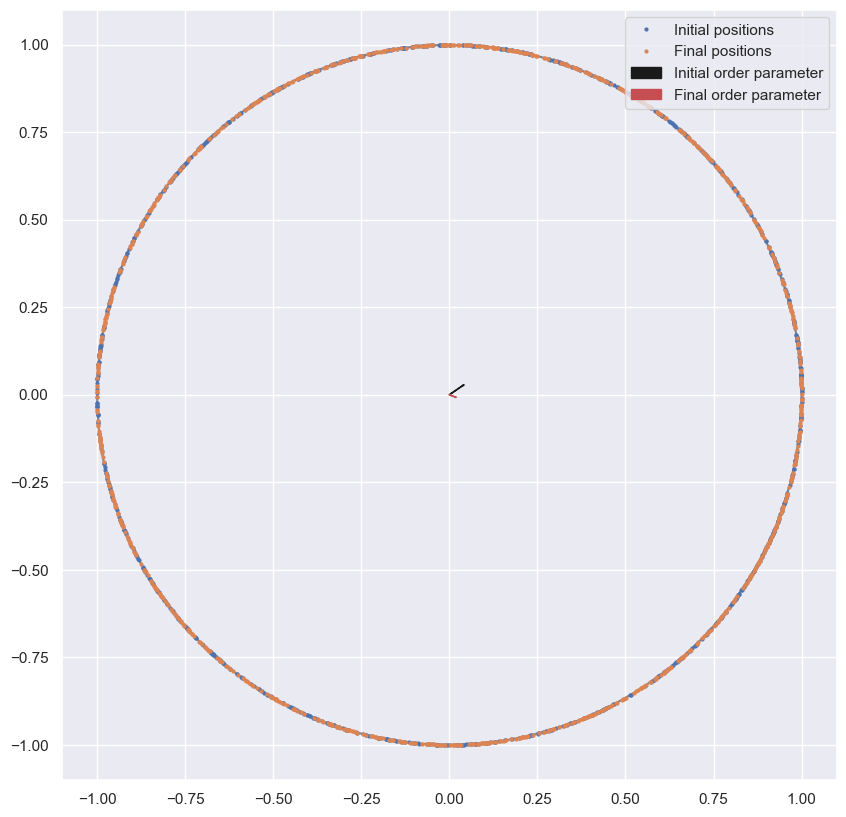

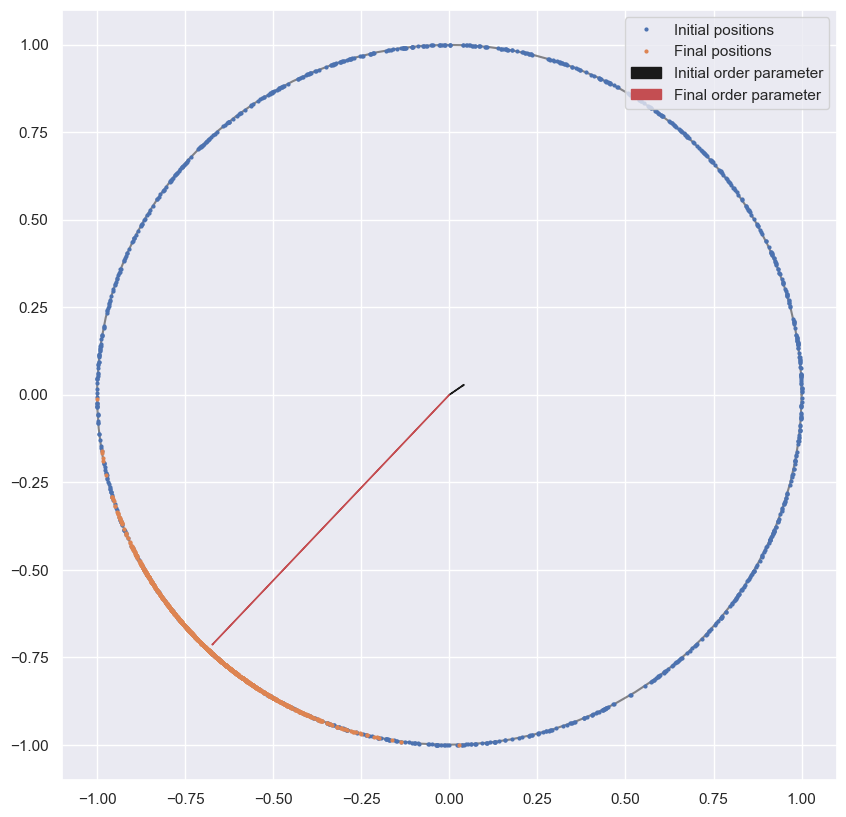

In [4]:
# Plot the results on a circle theta is an angle
# Plot the k_index
k_index = 0
plot_oscillator(theta, r_t, k_index)
# Plot the k_index
k_index = 25
plot_oscillator(theta, r_t, k_index)


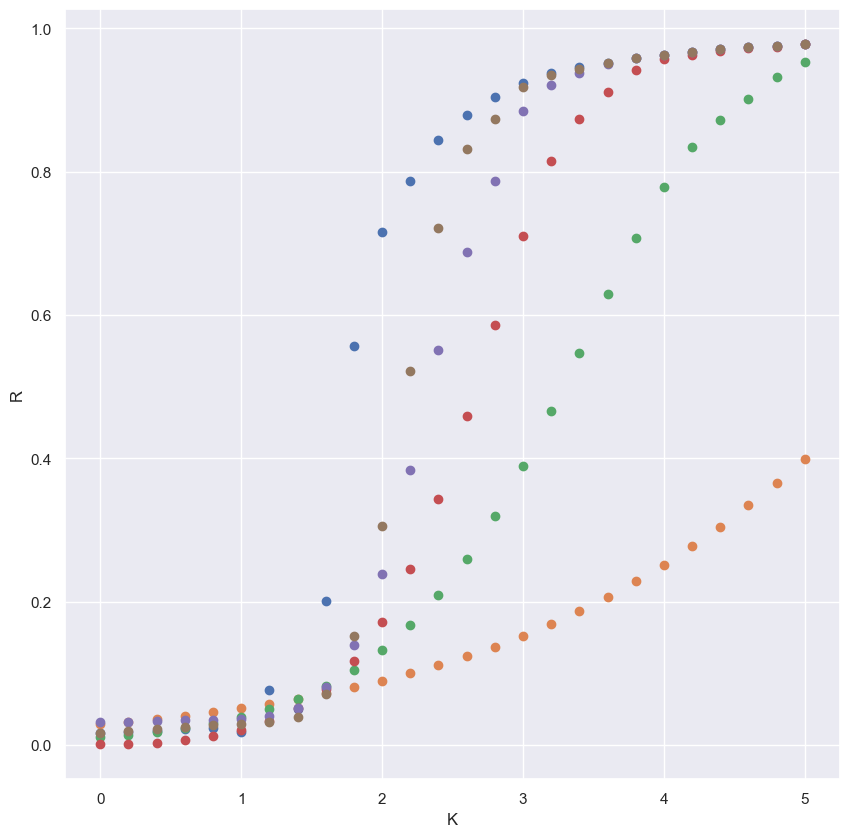

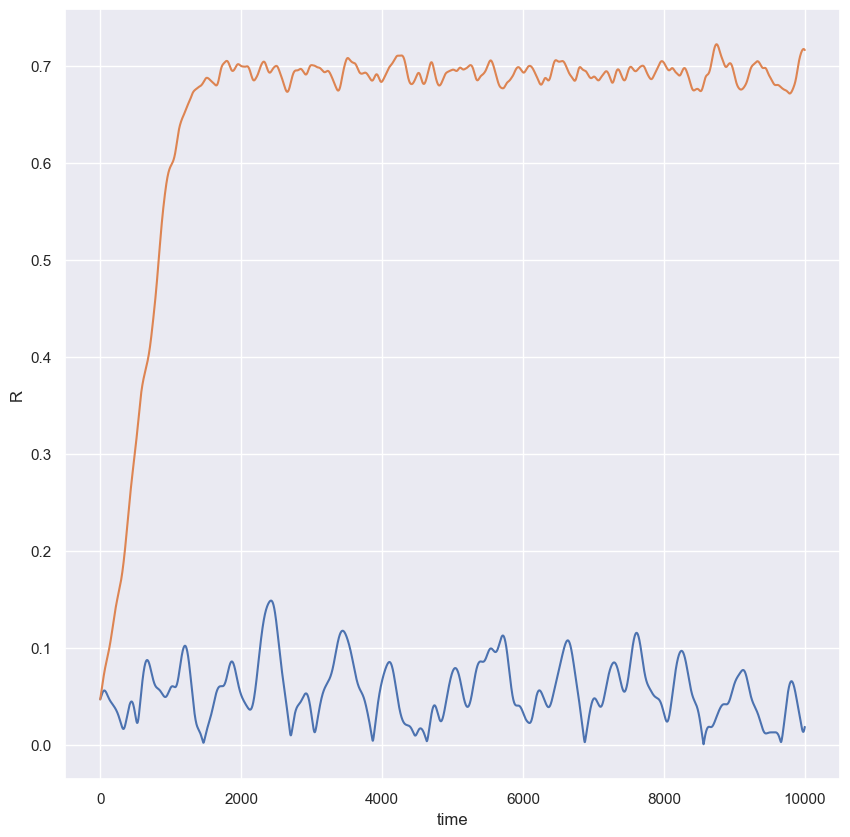

In [5]:
plt.figure(figsize=(10,10))
plt.plot(K, r_t[0,-1,:],'o')
plt.plot(K, r_t[0,100,:],'o')
plt.plot(K, r_t[0,200,:],'o')
plt.plot(K, r_t[0,300,:],'o')
plt.plot(K, r_t[0,400,:],'o')
plt.plot(K, r_t[0,500,:],'o')

plt.xlabel('K')
plt.ylabel('R')
plt.show()


# Plot the order parameter as a function of time for a given K
plt.figure(figsize=(10,10))
plt.plot(r_t[0,:,np.where(K==1)[0][0]]) 
plt.plot(r_t[0,:,np.where(K==2)[0][0]])
plt.xlabel('time')
plt.ylabel('R')
plt.show()

In [11]:
from scipy.integrate import quad

# Define the function g
def g(KrSinTheta, dist='normal'):
    if dist == 'normal':
        return 1 / np.sqrt(2 * np.pi) * np.exp(-KrSinTheta ** 2 / 2)
    elif dist == 'uniform':
        mask = np.logical_and(-0.5 <= KrSinTheta, KrSinTheta <= 0.5)
        return np.where(mask, 1/(2 * 0.5), 0)
    else:
        raise ValueError("Invalid value for 'dist'. Choose 'normal' or 'uniform'.")


# Define the function that calculates the order parameter r
from scipy.integrate import quad

def consistency_relation1(r, K, dist='normal'):
    # Define the integration limits
    a = -np.pi / 2
    b = np.pi / 2
    # Define the integrand
    integrand = lambda theta: np.cos(theta) ** 2 * g(K * r * np.sin(theta), dist=dist)
    # Perform the integration
    result, _ = quad(integrand, a, b)
    return 1 - K * result

from scipy.optimize import fsolve
dist = 'uniform'
# #r_solution = fsolve(consistency_relation1, x0=1, args=(K, dist))
# # Define a range of K values
# dK = 0.03
# Kmax = 1.5
# K = np.arange(0,Kmax,dK)

# # Find the solution for each K value
# r_solutions = [fsolve(consistency_relation1, x0=0, args=(k, dist), xtol=1e-10)[0] for k in K]

# # Plot the solution
# plt.plot(K, np.abs (np.array(r_solutions)))
# plt.xlabel('K')
# plt.ylabel('r')
# plt.title('Order parameter r over parameter K')
# plt.show()


/Users/Alex/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: xtol=0.000000 is too small, no further improvement in the approximate
  solution is possible.
  warnings.warn(msg, RuntimeWarning)
/Users/Alex/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


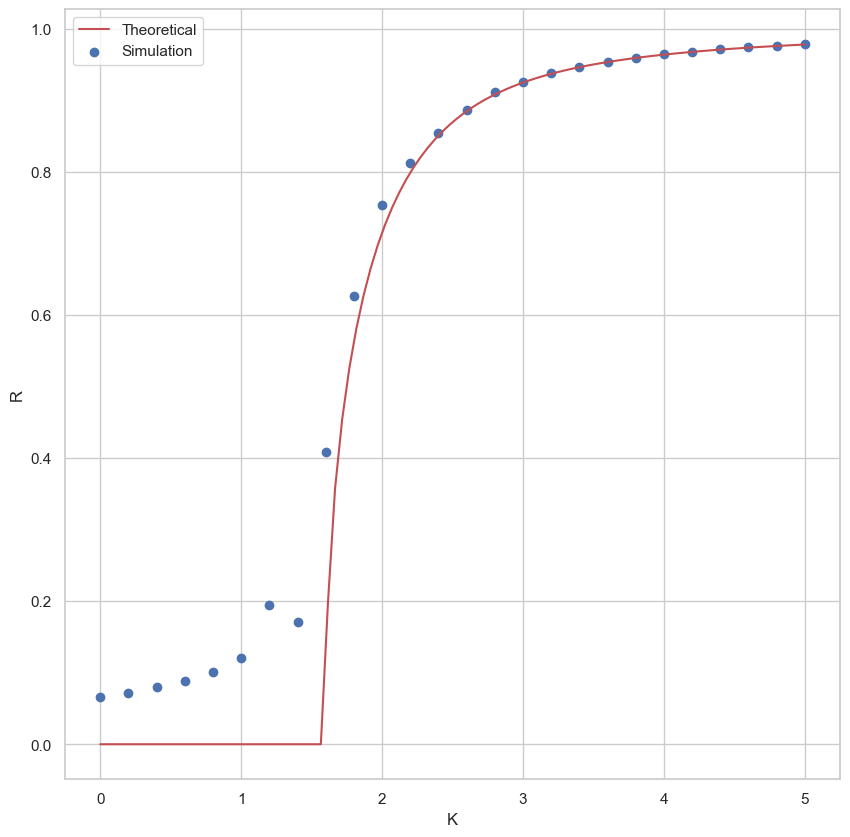

The mean difference between the theoretical and the simulated order parameter for K > K_c is:  0.05358416911688408


In [169]:
# moreover the order parameter satisfies the consistency relation
# 1 = K int_-pi^pi K*r*normaldistribution (k*r* sin(theta)) dtheta
# find the r value that satisfies the consistency relation
def normal_distribution(omega):
    return 1/(np.sqrt(2*np.pi))*np.exp(-omega**2/2)
def uniform_distribution(omega, gamma):
    return 1

import scipy.integrate as integrate
from scipy.optimize import fsolve
def integrand(x, k, r, n):
    if n ==0 : 
        return np.cos(x)*np.cos(x)*normal_distribution(k*r*np.sin(x))
    else : 
        return np.cos(x)*np.cos(x)*uniform_distribution(k*r*np.sin(x), 0.5)
def consistency_relation(r,*args):
    k = args[0]
    n = args[1]
    return 1 - k*integrate.quad(integrand, -np.pi/2, np.pi/2, args=(k,r,n))[0]
def function_anal(r,*args):
    k = args[0]
    n = args[1]
    return 1/2*(np.sqrt(1-(1/(2*k*r))**2) + (2*k*r)*np.arcsin(1/(2*k*r)))
import scipy.stats
# Find the r value that satisfies the consistency relation
#Select the distribution of the natural frequencies n = 0 normal, n = 1 uniform
def plot_consistency_relation(n, K, r_t):
    
    K_space = np.linspace(0, max(K), 100)
    r_sat = np.zeros(K_space.size)
    r_diff = np.zeros(K.size)
    K_c = np.sqrt(8/np.pi)
    for k in range(K_space.size):
        if K_space[k] > K_c:
            r_sat[k] = fsolve(consistency_relation, 1,args=(K_space[k], n), xtol=1e-16)
            #r_sat[k] = fsolve(function_anal, 0.8,args=(K_space[k], n), xtol=1e-16)
    plt.figure(figsize=(10,10))
    #plt.scatter(K_space, np.abs(np.array(r_sat)), label='Theoretical')
    plt.plot(K_space, np.abs(np.array(r_sat)), color = 'r' ,label='Theoretical')
    plt.scatter(K, r_t[0,-1,:], label = "Simulation" )
    # Plot r over K
    plt.xlabel('K')
    plt.ylabel('R')
    plt.legend()
    plt.show()
    # Print also the mean Difference between the theoretical and the simulated order parameter for K > K_c
    for k in range(K.size):
        if K[k] > K_c:
            r_diff[k] = fsolve(consistency_relation, 1 ,args=(K[k], 0), xtol=1e-16)
            r_diff[k] = np.abs(r_diff[np.where(K== K[k])[0][0]] - r_t[0,-1,k])
    print("The mean difference between the theoretical and the simulated order parameter for K > K_c is: ", np.mean(r_diff[np.where(r_diff != 0)]/r_t[0,-1,np.where(K > K_c)]))

plot_consistency_relation(0, K, r_t)


<h1>1.2.2 Natural frequencies uniformly distributed</h1>



In [170]:
gamma = 0.5

#define variables 
N = 2000
T = 2000
dt = 0.05
dK = 0.03
Kmax = 1.5
K = np.arange(0,Kmax,dK)

print ("The phase transition occurs at K = ", 2/3.14)
# Initial conditions: uniformly distribute the initial phase and frequencies
theta0 = np.random.uniform(-np.pi , np.pi , N )
omega0 = np.random.uniform(-gamma, gamma, N)
# Plot the sampled distribution of the natural frequencies
# plt.figure(figsize=(10,10))
# plt.hist(omega0, bins=50, density=True)
# plt.show()

# Compute the kuramoto model
#theta, r_t = Kuramoto(theta0,omega0,N,T,dt,K)
theta, r_t = Kuramoto_order_fast(theta0,omega0,N,T,dt,K)


The phase transition occurs at K =  0.6369426751592356
2000 2000 0.05 50
|████████████████████████████████████████| 50/50 [100%] in 4:18.7 (0.19/s)                                              


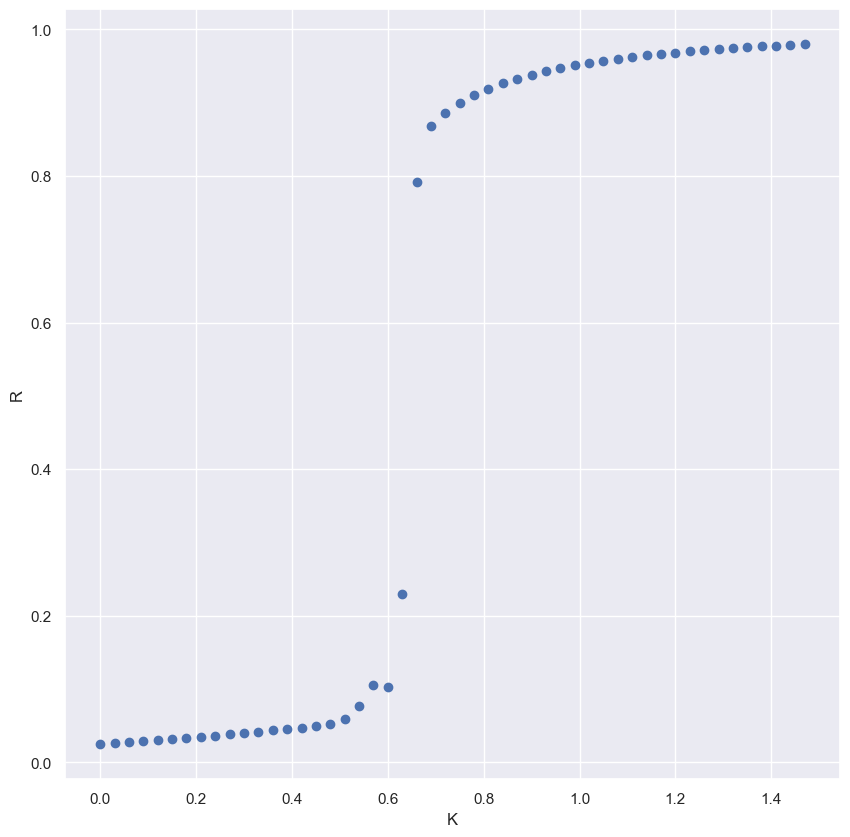

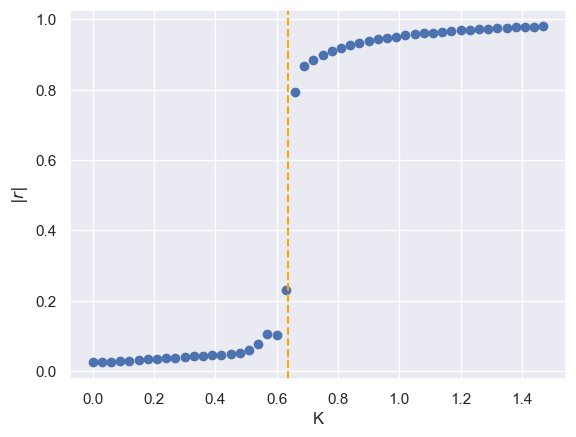

/var/folders/6g/jfjxp2713gzcmhbs0t_zwsn00000gp/T/ipykernel_25923/2208818128.py:7: RuntimeWarning: overflow encountered in power
  return np.exp(-omega**5000/2)


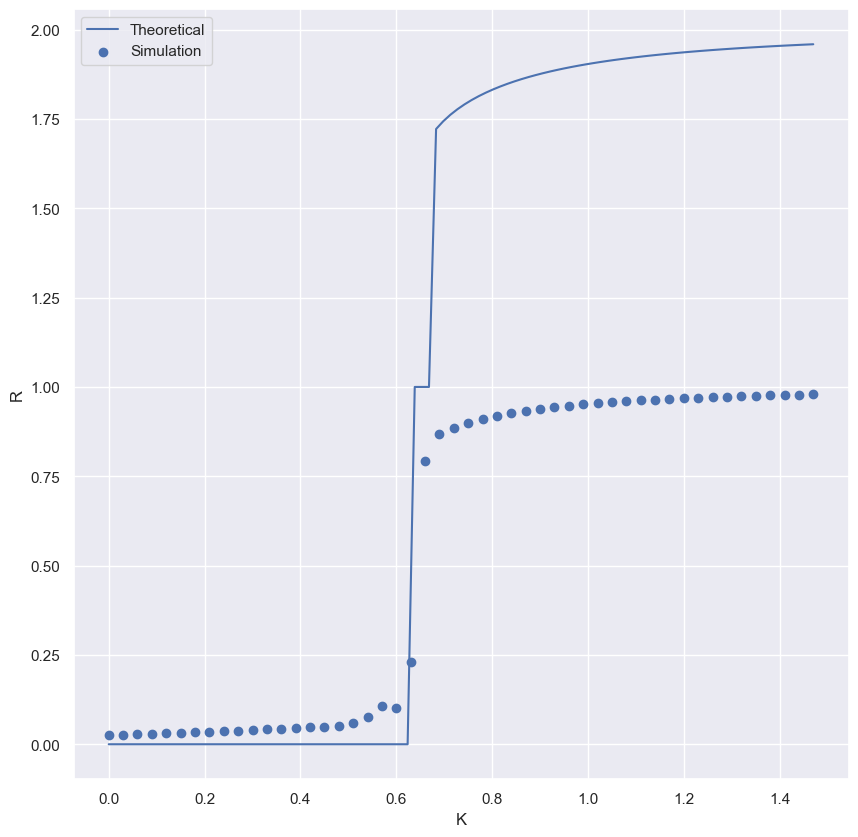

The mean difference between the theoretical and the simulated order parameter for K > K_c is:  0.9998924900302564


In [20]:
plot_order_parameter_RK(r_t, K)
# Plot the order parameter as a function of K
plt.scatter(K, r_t[0,-1,:])
# plot a line at K = 2/3.14
plt.axvline(x=2/3.14, color='orange', linestyle='--')
plt.xlabel('K')
plt.ylabel(r'$|r|$')
plt.show()


plot_consistency_relation(1, K, r_t)

<h1>Point 4 : fixed realisation of the natural frequencies ωi, i=1,...,N <h1>

In [173]:
gamma = 0.5

#define variables 
N = 2000
dt = 0.05
T = int(200/dt)
K = np.ones(10)
# Fix the realisation of the natural frequencies
omega0_fixed = np.random.uniform(-gamma, gamma, N)
#Perform the simulation 10 times 
R = np.zeros((2,K.size)) # R[0] = R, R[1] = phase
r_t_fixed_omega = np.zeros((2,T,K.size))
print(N,T,dt,K.size) 
theta = np.zeros((N,T,K.size))
# Integrate the kuramoto model with the euler method
with ap.alive_bar(K.size, force_tty=True) as bar:
    for k in range(K.size):
        theta0 = np.random.uniform(-np.pi , np.pi , N )
        print( str(k) + " realization of theta0 ,fixed omega0")
        theta[:,0,k] = theta0
        r_t_fixed_omega[0,0,k] = np.abs(1/N*np.sum(np.exp(1j*theta[:,0,k])))
        r_t_fixed_omega[1,0,k] = np.angle(1/N*np.sum(np.exp(1j*theta[:,0,k])))
        for t in range(1,T):
            for i in range(N):
                theta[i,t,k] = theta[i,t-1,k] + dt*omega0_fixed[i] + dt*(K[k]*r_t_fixed_omega[0,t-1,k]* np.sin(r_t_fixed_omega[1,t-1,k] - theta[i,t-1,k]))
            r_t_fixed_omega[0,t,k] = np.abs(1/N*np.sum(np.exp(1j*theta[:,t,k])))
            r_t_fixed_omega[1,t,k] = np.angle(1/N*np.sum(np.exp(1j*theta[:,t,k])))
        bar()

2000 4000 0.05 10
on 0: 0 realization of theta0 ,fixed omega0                                                                             
on 1: 1 realization of theta0 ,fixed omega0                                                                             
on 2: 2 realization of theta0 ,fixed omega0                                                                             
on 3: 3 realization of theta0 ,fixed omega0                                                                             
on 4: 4 realization of theta0 ,fixed omega0                                                                             
on 5: 5 realization of theta0 ,fixed omega0                                                                             
on 6: 6 realization of theta0 ,fixed omega0                                                                             
on 7: 7 realization of theta0 ,fixed omega0                                                                             
on 8: 8 realiz

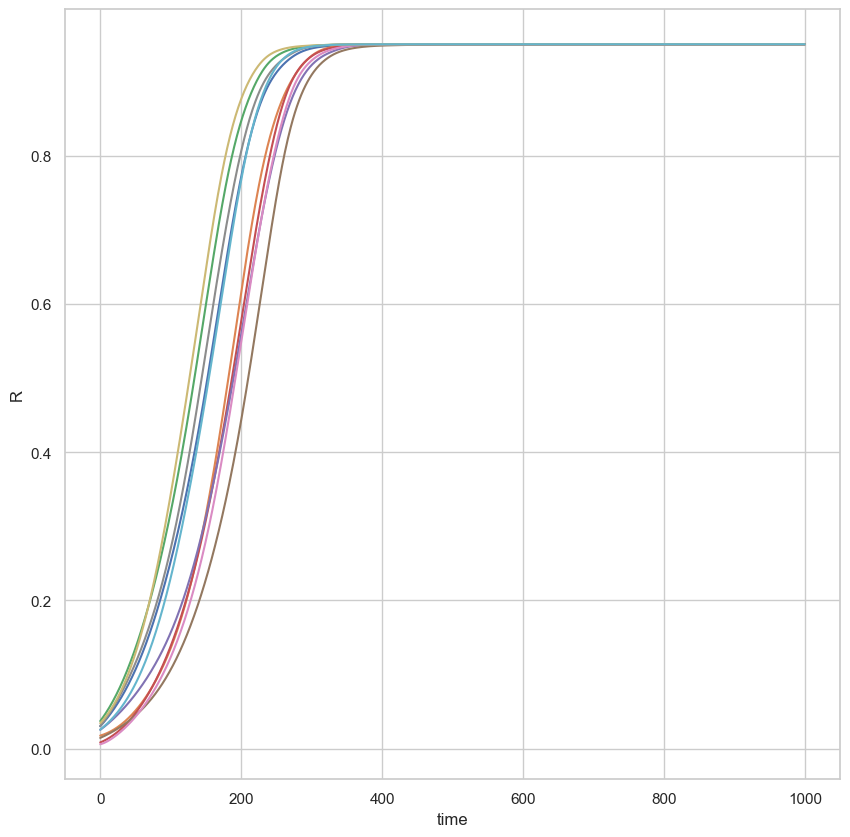

In [175]:
sns.color_palette("hls", 8)
# Plot the order parameter as a function of time for a given K
plt.figure(figsize=(10,10))
for i in range(10):
    plt.plot(r_t_fixed_omega[0,:1000,i])
plt.xlabel('time')
plt.ylabel('R')
plt.show()




In [176]:
N = 2000
K = np.ones(10)
    # Order parameter
R = np.zeros((2,K.size)) # R[0] = R, R[1] = phase
r_t_fixed_theta = np.zeros((2,T,K.size))
print(N,T,dt,K.size) 
theta0 = np.random.uniform(-np.pi , np.pi , N )
theta = np.zeros((N,T,K.size))
# Integrate the kuramoto model with the euler method
with ap.alive_bar(K.size, force_tty=True) as bar:
    for k in range(K.size):
        theta[:,0,k] = theta0
        omega0 = np.random.uniform(-gamma , gamma , N )
        print( str(k) + " realization of omega0, fixed theta0")
        r_t_fixed_theta[0,0,k] = np.abs(1/N*np.sum(np.exp(1j*theta[:,0,k])))
        r_t_fixed_theta[1,0,k] = np.angle(1/N*np.sum(np.exp(1j*theta[:,0,k])))
        for t in range(1,T):
            for i in range(N):
                theta[i,t,k] = theta[i,t-1,k] + dt*omega0[i] + dt*(K[k]*r_t_fixed_theta[0,t-1,k]* np.sin(r_t_fixed_theta[1,t-1,k] - theta[i,t-1,k]))
            r_t_fixed_theta[0,t,k] = np.abs(1/N*np.sum(np.exp(1j*theta[:,t,k])))
            r_t_fixed_theta[1,t,k] = np.angle(1/N*np.sum(np.exp(1j*theta[:,t,k])))
        bar()

2000 4000 0.05 10
on 0: 0 realization of omega0, fixed theta0                                                                             
on 1: 1 realization of omega0, fixed theta0                                                                             
on 2: 2 realization of omega0, fixed theta0                                                                             
on 3: 3 realization of omega0, fixed theta0                                                                             
on 4: 4 realization of omega0, fixed theta0                                                                             
on 5: 5 realization of omega0, fixed theta0                                                                             
on 6: 6 realization of omega0, fixed theta0                                                                             
on 7: 7 realization of omega0, fixed theta0                                                                             
on 8: 8 realiz

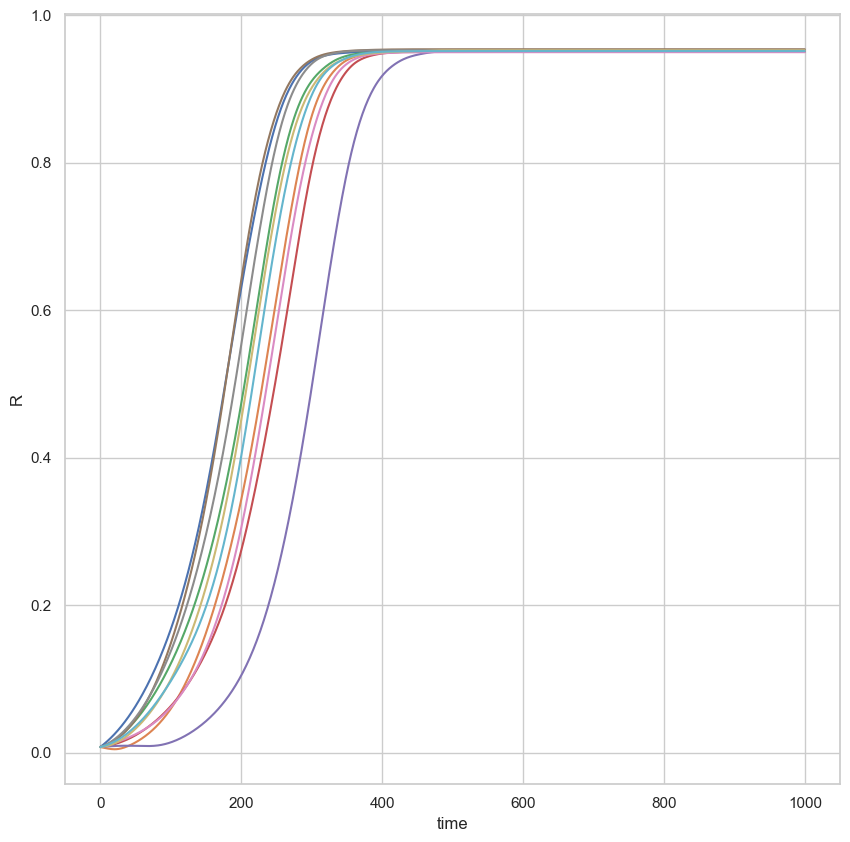

In [177]:
#theta0 = np.random.uniform(-np.pi , np.pi , N )
#theta, r_t = Kuramoto_order_fast(theta0,omega0,N,T,dt,K, "omega_random")

# Plot the order parameter as a function of time for a given K
plt.figure(figsize=(10,10))
for i in range(10):
    plt.plot(r_t_fixed_theta[0,:1000,i], label =str(i))
plt.xlabel('time')
plt.ylabel('R')
plt.show()

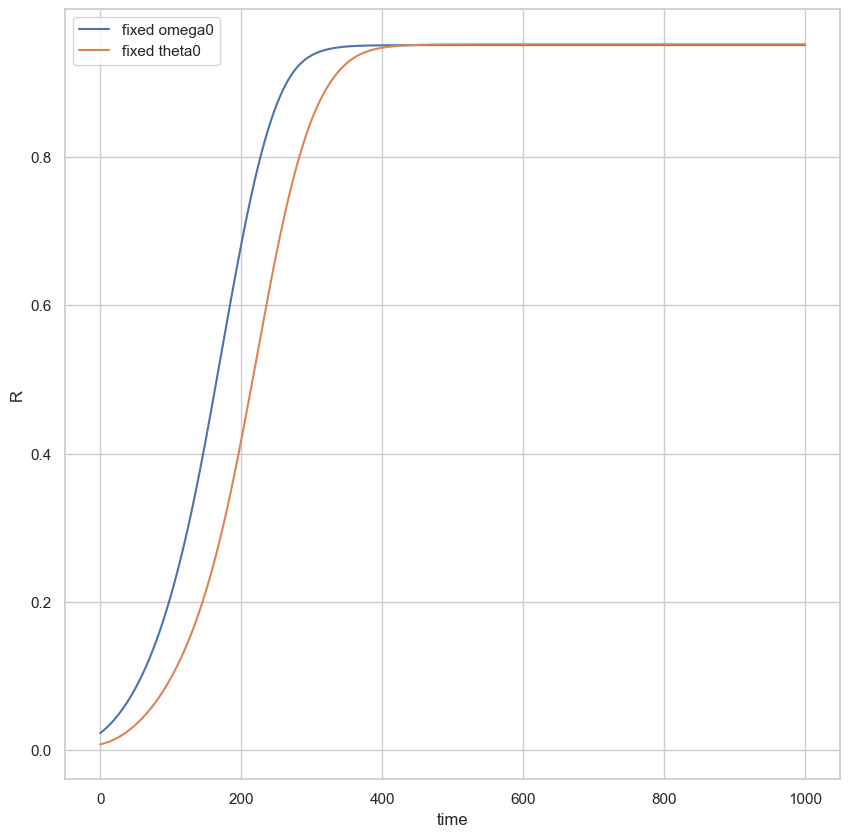

In [179]:
# Plot r_t for fixed omega0 and fixed theta0 overlapped 
plt.figure(figsize=(10,10))
# Do the mean of the 10 realizations
r_t_fixed_omega_mean = np.mean(r_t_fixed_omega, axis=2)
r_t_fixed_theta_mean = np.mean(r_t_fixed_theta, axis=2)
plt.plot(r_t_fixed_omega_mean[0,:1000], label = "fixed omega0")
plt.plot(r_t_fixed_theta_mean[0,:1000], label = "fixed theta0")
plt.xlabel('time')
plt.ylabel('R')
plt.legend()

<h1> Kuramoto on watts strogatz<h1>

In [123]:
import numpy as np
from scipy.integrate import odeint


class Kuramoto_graph:

    def __init__(self, coupling=1, dt=0.01, T=10, n_nodes=None, natfreqs=None):
        '''
        coupling: float
            Coupling strength. Default = 1. Typical values range between 0.4-2
        dt: float
            Delta t for integration of equations.
        T: float
            Total time of simulated activity.
            From that the number of integration steps is T/dt.
        n_nodes: int, optional
            Number of oscillators.
            If None, it is inferred from len of natfreqs.
            Must be specified if natfreqs is not given.
        natfreqs: 1D ndarray, optional
            Natural oscillation frequencies.
            If None, then new random values will be generated and kept fixed
            for the object instance.
            Must be specified if n_nodes is not given.
            If given, it overrides the n_nodes argument.
        '''
        if n_nodes is None and natfreqs is None:
            raise ValueError("n_nodes or natfreqs must be specified")

        self.dt = dt
        self.T = T
        self.coupling = coupling

        if natfreqs is not None:
            self.natfreqs = natfreqs
            self.n_nodes = len(natfreqs)
        else:
            self.n_nodes = n_nodes
            self.natfreqs = np.random.normal(size=self.n_nodes)

    def init_angles(self):
        '''
        Random initial random angles (position, "theta").
        '''
        return np.random.uniform(-np.pi,np.pi,size=self.n_nodes)

    def derivative(self, angles_vec, t, adj_mat, coupling):
        '''
        Compute derivative of all nodes for current state, defined as
        dx_i    natfreq_i + k  sum_j ( Aij* sin (angle_j - angle_i) )
        ---- =             ---
         dt                M_i
        t: for compatibility with scipy.odeint
        '''
        assert len(angles_vec) == len(self.natfreqs) == len(adj_mat), \
            'Input dimensions do not match, check lengths'

        angles_i, angles_j = np.meshgrid(angles_vec, angles_vec)
        interactions = adj_mat * np.sin(angles_j - angles_i)  # Aij * sin(j-i)

        dxdt = self.natfreqs + coupling * interactions.sum(axis=0)  # sum over incoming interactions
        return dxdt

    def integrate(self, angles_vec, adj_mat):
        '''Updates all states by integrating state of all nodes'''
        # Coupling term (k / Mj) is constant in the integrated time window.
        # Compute it only once here and pass it to the derivative function
        n_interactions = (adj_mat != 0).sum(axis=0)  # number of incoming interactions
        coupling = self.coupling / n_interactions  # normalize coupling by number of interactions

        t = np.linspace(0, self.T, int(self.T/self.dt))
        timeseries = odeint(self.derivative, angles_vec, t, args=(adj_mat, coupling))
        return timeseries.T  # transpose for consistency (act_mat:node vs time)

    def run(self, adj_mat=None, angles_vec=None):
        '''
        adj_mat: 2D nd array
            Adjacency matrix representing connectivity.
        angles_vec: 1D ndarray, optional
            States vector of nodes representing the position in radians.
            If not specified, random initialization [0, 2pi].
        Returns
        -------
        act_mat: 2D ndarray
            Activity matrix: node vs time matrix with the time series of all
            the nodes.
        '''
        if angles_vec is None:
            angles_vec = self.init_angles()

        return self.integrate(angles_vec, adj_mat)

    @staticmethod

    def mean_frequency(self, act_mat, adj_mat):
        '''
        Compute average frequency within the time window (self.T) for all nodes
        '''
        assert len(adj_mat) == act_mat.shape[0], 'adj_mat does not match act_mat'
        _, n_steps = act_mat.shape

        # Compute derivative for all nodes for all time steps
        dxdt = np.zeros_like(act_mat)
        for time in range(n_steps):
            dxdt[:, time] = self.derivative(act_mat[:, time], None, adj_mat)

        # Integrate all nodes over the time window T
        integral = np.sum(dxdt * self.dt, axis=1)
        # Average across complete time window - mean angular velocity (freq.)
        meanfreq = integral / self.T
        return meanfreq

In [141]:
import networkx as nx
from scipy.integrate import odeint
def plot_activity(activity):
    """
    Plot sin(angle) vs time for each oscillator time series.
    activity: 2D-np.ndarray
        Activity time series, node vs. time; ie output of Kuramoto.run()
    return:
        matplotlib axis for further customization
    """
    _, ax = plt.subplots(figsize=(12, 4))
    ax.plot(np.sin(activity.T))
    ax.set_xlabel('Time', fontsize=25)
    ax.set_ylabel(r'$\sin(\theta)$', fontsize=25)
    return ax
def plot_phase_coherence(activity, adj_mat):
    """
    Plot order parameter phase_coherence vs time.
    activity: 2D-np.ndarray
        Activity time series, node vs. time; ie output of Kuramoto.run()
    return:
        matplotlib axis for further customization
    """
    _, ax = plt.subplots(figsize=(8, 3))
    ph = np.array([Kuramoto_graph.phase_coherence(activity[:, i], adj_mat) for i in range(activity.shape[1])])
    ax.plot(ph)
    ax.set_ylabel(r'Order parameter')
    ax.set_xlabel(r'Time')
    ax.set_ylim((-0.01, 1.01))
    plt.show()
    return ax
def order_coherence(act_mat, adj_mat):
        '''
        Compute global order parameter R_t - mean length of resultant vector
        '''
        #suma = np.sum([(np.e ** (1j * i)) for i in angles_vec])
        degree = (adj_mat != 0).sum(axis=0)
        suma = np.sum([np.exp(1j * i) * d for i, d in zip(act_mat[:,-1], degree)])
        return abs(suma / np.sum(degree))
def order_coherence1(angles, adj_mat):
        '''
        Compute global order parameter R_t - mean length of resultant vector
        '''
        #suma = np.sum([(np.e ** (1j * i)) for i in angles_vec])
        degree = (adj_mat != 0).sum(axis=0)
        suma = np.sum([np.exp(1j * i) * d for i, d in zip(angles, degree)])
        return abs(suma / np.sum(degree))
# Parameters
N = 2000 # number of oscillators
K = np.arange(0, 8.5, 0.5) # coupling strength
T = 200 # total time of simulation
dt = 0.01 # time step
prob = np.array([0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
K_c = np.zeros(prob.size)
nat_frequency = np.random.normal(0, 1, N)
t = np.linspace(0, T, int (T/dt))
# Initialize the phases of the oscillators
angles_vec = np.random.uniform(-np.pi, np.pi, N)
grid_array = np.zeros((len(prob), len(K)))
for p in range(prob.size):
# Create a Watts-Strogatz network
    G = nx.watts_strogatz_graph(N, 6, prob[p])
    graph = nx.to_numpy_array(G)
    degrees = np.sum(graph, axis=0)
    #adj_mat = nx.adjacency_matrix(G).todense()
    for k in range(K.size):
        model = Kuramoto_graph(coupling=K[k], dt=dt, T=T, n_nodes=len(graph))
        act_mat = model.run(adj_mat=graph)
        grid_array[p, k] = order_coherence(act_mat, graph)
        print('p = ', prob[p], 'k = ', K[k], act_mat.shape)
    #K_c[p] = (2/np.pi)*((np.mean(degrees))/np.mean(degrees**2))
        #plot_phase_coherence(act_mat, graph)
#print (act_mat.shape)
#plot_activity(act_mat)



p =  0.0 k =  0.0 (2000, 20000)
p =  0.0 k =  0.5 (2000, 20000)
p =  0.0 k =  1.0 (2000, 20000)
p =  0.0 k =  1.5 (2000, 20000)
p =  0.0 k =  2.0 (2000, 20000)
p =  0.0 k =  2.5 (2000, 20000)
p =  0.0 k =  3.0 (2000, 20000)
p =  0.0 k =  3.5 (2000, 20000)
p =  0.0 k =  4.0 (2000, 20000)
p =  0.0 k =  4.5 (2000, 20000)
p =  0.0 k =  5.0 (2000, 20000)
p =  0.0 k =  5.5 (2000, 20000)
p =  0.0 k =  6.0 (2000, 20000)
p =  0.0 k =  6.5 (2000, 20000)
p =  0.0 k =  7.0 (2000, 20000)
p =  0.0 k =  7.5 (2000, 20000)
p =  0.0 k =  8.0 (2000, 20000)
p =  0.05 k =  0.0 (2000, 20000)
p =  0.05 k =  0.5 (2000, 20000)
p =  0.05 k =  1.0 (2000, 20000)
p =  0.05 k =  1.5 (2000, 20000)
p =  0.05 k =  2.0 (2000, 20000)
p =  0.05 k =  2.5 (2000, 20000)
p =  0.05 k =  3.0 (2000, 20000)
p =  0.05 k =  3.5 (2000, 20000)
p =  0.05 k =  4.0 (2000, 20000)
p =  0.05 k =  4.5 (2000, 20000)
p =  0.05 k =  5.0 (2000, 20000)
p =  0.05 k =  5.5 (2000, 20000)
p =  0.05 k =  6.0 (2000, 20000)
p =  0.05 k =  6.5 (2000, 2

/var/folders/6g/jfjxp2713gzcmhbs0t_zwsn00000gp/T/ipykernel_25923/4056269358.py:9: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim((0, 1))


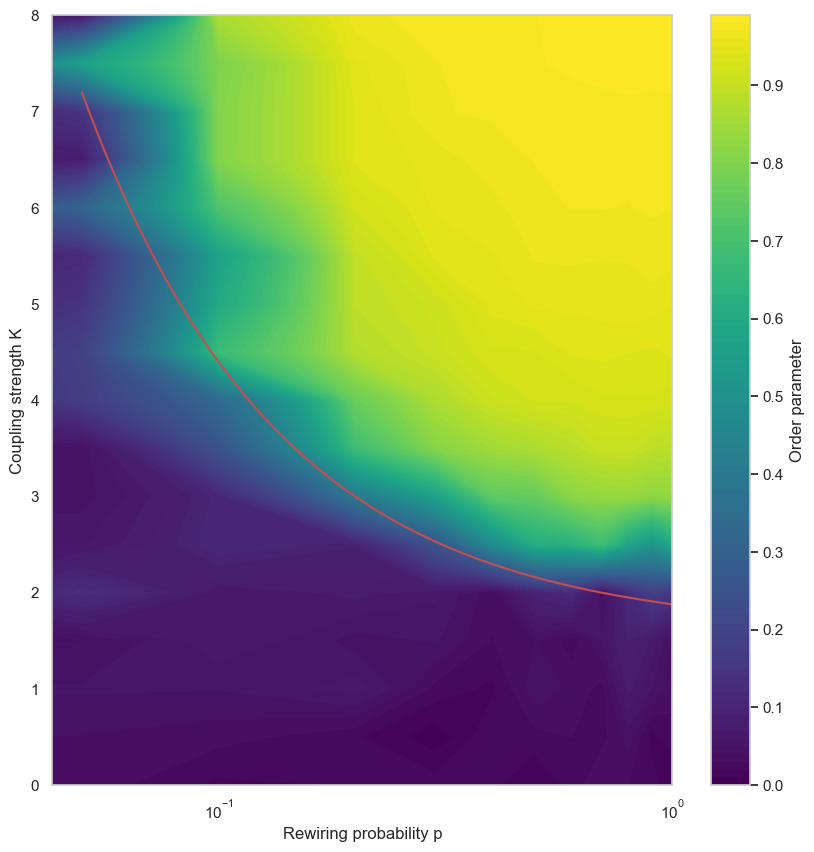

In [158]:
# Do a heatmap of the grid_array
plt.figure(figsize=(10, 10))
plt.contourf(prob, K, grid_array.T, 100, cmap='viridis')
dense = np.linspace(0.05,prob[-1],1000)
plt.plot(dense, 1.6 + 0.28/dense, 'r' , label=r'Critical coupling $K_c$')
#plt.plot(np.log10(prob[1:]), K_c[1:], 'r', label=r'$2p$')
plt.colorbar(label='Order parameter')
plt.xscale('log')
plt.xlim((0, 1))
plt.ylabel(r'Coupling strength K')
plt.xlabel(r'Rewiring probability p')
plt.savefig('./images/K_p_log.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


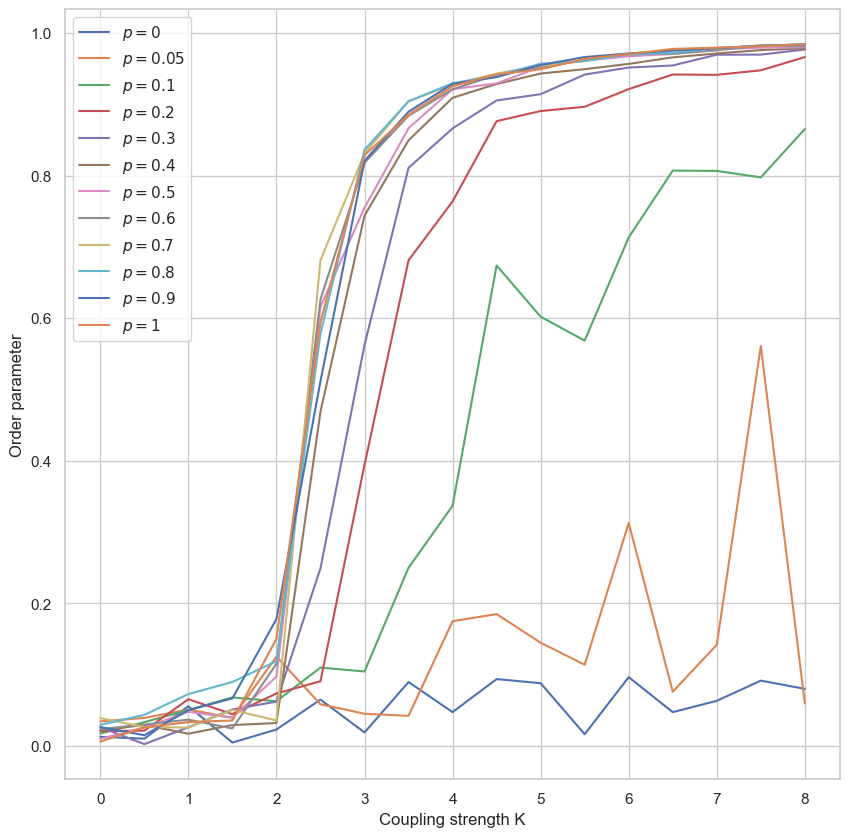

In [149]:
# Rewiring parameter as a function of the coupling strength for every p
sns.set_style("whitegrid")
plt.figure(figsize=(10, 10))
plt.plot(K, grid_array[0,:], label=r'$p=0$')
plt.plot(K, grid_array[1,:], label=r'$p=0.05$')
plt.plot(K, grid_array[2,:], label=r'$p=0.1$')
plt.plot(K, grid_array[3,:], label=r'$p=0.2$')
plt.plot(K, grid_array[4,:], label=r'$p=0.3$')
plt.plot(K, grid_array[5,:], label=r'$p=0.4$')
plt.plot(K, grid_array[6,:], label=r'$p=0.5$')
plt.plot(K, grid_array[7,:], label=r'$p=0.6$')
plt.plot(K, grid_array[8,:], label=r'$p=0.7$')
plt.plot(K, grid_array[9,:], label=r'$p=0.8$')
plt.plot(K, grid_array[10,:], label=r'$p=0.9$')
plt.plot(K, grid_array[11,:], label=r'$p=1$')
plt.xlabel(r'Coupling strength K')
plt.ylabel(r'Order parameter')
plt.legend()
plt.savefig('./images/K_r_p.eps')
plt.show()

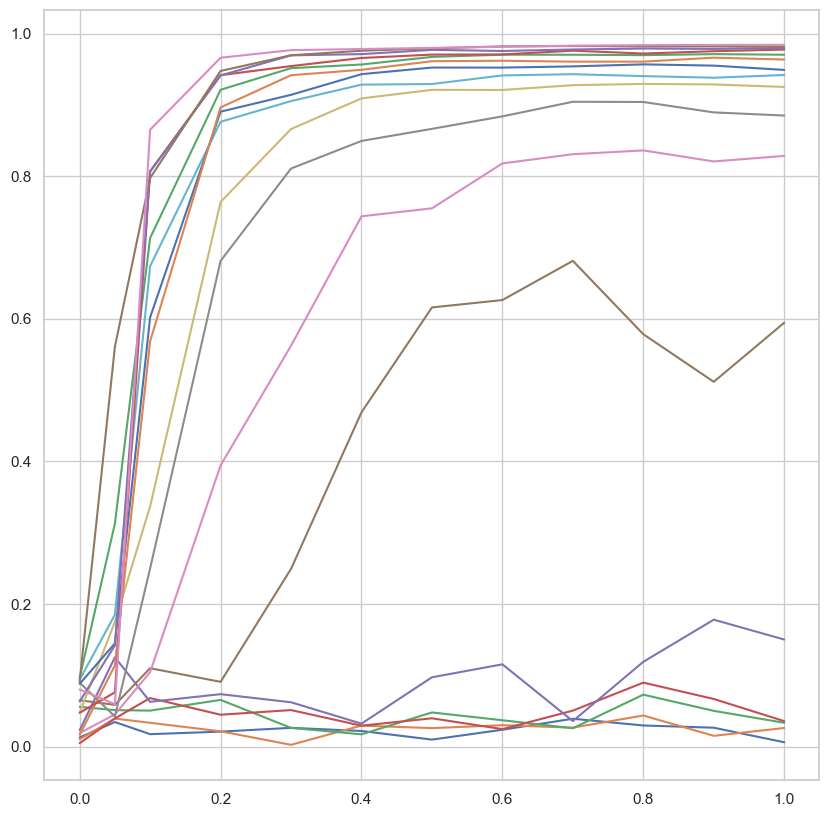

In [159]:
# Plot the order parameter as a function of p for a certain K
sns.set_style("whitegrid")
plt.figure(figsize=(10, 10))
plt.plot(prob, grid_array[:, 0], label=r'$K=0$')
plt.plot(prob, grid_array[:, 1], label=r'$K=0.5$')
plt.plot(prob, grid_array[:, 2], label=r'$K=1$')
plt.plot(prob, grid_array[:, 3], label=r'$K=1.5$')
plt.plot(prob, grid_array[:, 4], label=r'$K=2$')
plt.plot(prob, grid_array[:, 5], label=r'$K=2.5$')
plt.plot(prob, grid_array[:, 6], label=r'$K=3$')
plt.plot(prob, grid_array[:, 7], label=r'$K=3.5$')
plt.plot(prob, grid_array[:, 8], label=r'$K=4$')
plt.plot(prob, grid_array[:, 9], label=r'$K=4.5$')
plt.plot(prob, grid_array[:, 10], label=r'$K=5$')
plt.plot(prob, grid_array[:, 11], label=r'$K=5.5$')
plt.plot(prob, grid_array[:, 12], label=r'$K=6$')
plt.plot(prob, grid_array[:, 13], label=r'$K=6.5$')
plt.plot(prob, grid_array[:, 14], label=r'$K=7$')
plt.plot(prob, grid_array[:, 15], label=r'$K=7.5$')
plt.plot(prob, grid_array[:, 16], label=r'$K=8$')
plt.show()

In [ ]:
def order_coherence1(angles, adj_mat):
        '''
        Compute global order parameter R_t - mean length of resultant vector
        '''
        #suma = np.sum([(np.e ** (1j * i)) for i in angles_vec])
        degree = (adj_mat != 0).sum(axis=0)
        suma = np.sum([np.exp(1j * i) * d for i, d in zip(angles, degree)])
        return abs(suma / np.sum(degree)) , np.angle(suma / np.sum(degree))


def Kuramoto_order_adjacency(theta0,omega0,N,T,dt,K, adj_mat):
    # Order parameter
    R = np.zeros((2,K.size)) # R[0] = R, R[1] = phase
    r_t = np.zeros((2,T,K.size))
    print(N,T,dt,K.size) 
    theta = np.zeros((N,T,K.size))
    # Integrate the kuramoto model with the euler method
    with ap.alive_bar(K.size, force_tty=True) as bar:
        for k in range(K.size):
            theta[:,0,k] = theta0
            omega0 = omega0
            r_t[0,0,k] = order_coherence1(theta[:,0,k], adj_mat)[0]
            r_t[1,0,k] = order_coherence1(theta[:,0,k], adj_mat)[1]
            for t in range(1,T):
                for i in range(N):
                    theta[i,t,k] = theta[i,t-1,k] + dt*omega0[i] + dt*(K[k]*r_t[0,t-1,k]* np.sin(r_t[1,t-1,k] - theta[i,t-1,k]))
                r_t[0,t,k] = order_coherence1(theta[:,t,k], adj_mat)[0]
                r_t[1,t,k] = order_coherence1(theta[:,t,k], adj_mat)[1]
            bar()
    return theta, r_t



N = 2000 # number of oscillators
K = np.arange(0, 8.5, 0.5) # coupling strength
T = 200 # total time of simulation
dt = 0.01 # time step
prob = np.array([0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
K_c = np.zeros(prob.size)
nat_frequency = np.random.normal(0, 1, N)
t = np.linspace(0, T, int (T/dt))
# Initialize the phases of the oscillators
angles_vec = np.random.uniform(-np.pi, np.pi, N)
grid_array = np.zeros((len(prob), len(K)))
for p in range(prob.size):
# Create a Watts-Strogatz network
    G = nx.watts_strogatz_graph(N, 6, prob[p])
    graph = nx.to_numpy_array(G)
    degrees = np.sum(graph, axis=0)
    #adj_mat = nx.adjacency_matrix(G).todense()
    for k in range(K.size):
        model = Kuramoto_graph(coupling=K[k], dt=dt, T=T, n_nodes=len(graph))
        act_mat = model.run(adj_mat=graph)
        grid_array[p, k] = order_coherence(act_mat, graph)
        print('p = ', prob[p], 'k = ', K[k], act_mat.shape)
    #K_c[p] = (2/np.pi)*((np.mean(degrees))/np.mean(degrees**2))
        #plot_phase_coherence(act_mat, graph)
#print (act_mat.shape)
#plot_activity(act_mat)

on 0: (1, 2000)                                                                                                         


on 0: /var/folders/6g/jfjxp2713gzcmhbs0t_zwsn00000gp/T/ipykernel_19641/3026597923.py:42: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
        A = nx.adjacency_matrix(WS).todense()


on 1: (1, 2000)                                                                                                         
on 2: (1, 2000)                                                                                                         
on 3: (1, 2000)                                                                                                         
on 4: (1, 2000)                                                                                                         
on 5: (1, 2000)                                                                                                         
on 6: (1, 2000)                                                                                                         
on 7: (1, 2000)                                                                                                         
on 8: (1, 2000)                                                                                                         
on 9: (1, 2000)                 

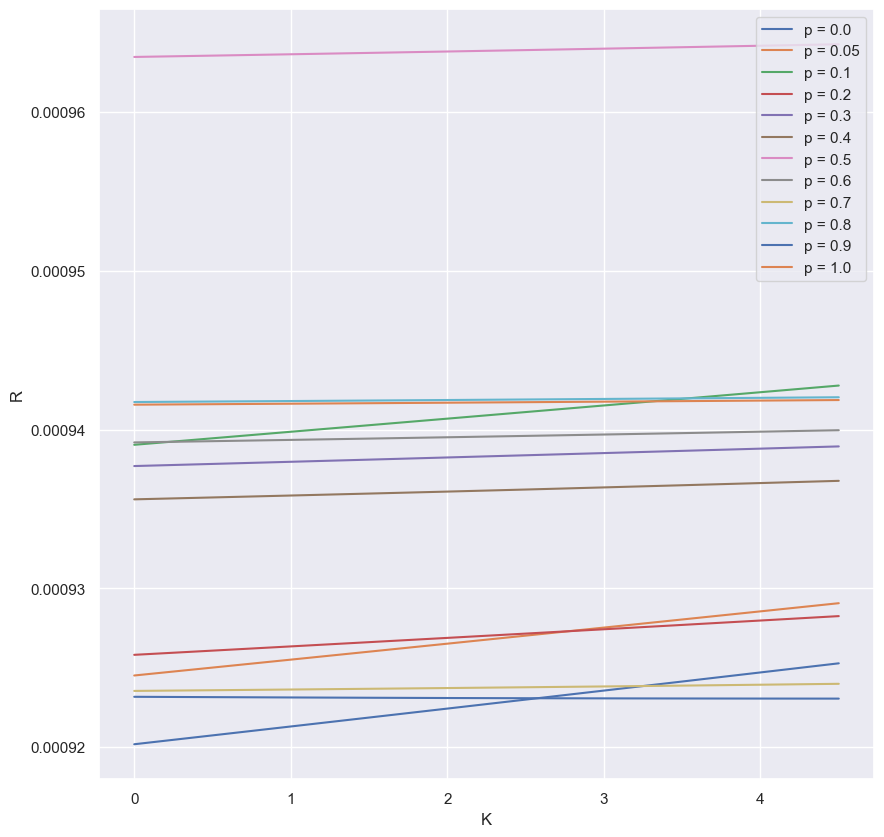

In [22]:
import networkx as nx
# Parallel programming in python 
import multiprocessing as mp
import multiprocessing.pool as mpp
import time

def Kuramoto_adjacency(theta0, omega0, N, T, dt, K, A, link):
        with ap.alive_bar(K.size, force_tty=True) as bar:
            theta = np.zeros((N,T,K.size))
            r_t = np.zeros((2,N,T,K.size))
            for k in range(K.size):
                theta[:,0,k] = theta0
                r_t[0,0,k] = np.abs(1/N*np.sum(np.exp(1j*theta[:,0,k])))
                r_t[1,0,k] = np.angle(1/N*np.sum(np.exp(1j*theta[:,0,k])))
                # get the indices of the non-zero elements
                indices = np.nonzero(A)
                for t in range(1,T):
                    for i in indices[0]:    
                        theta[i,t,k] = theta[i,t-1,k] + dt*(omega0[i] + (K[k]/link)*np.dot(A[i,indices[1]],np.sin(theta[indices[1],t-1,k] - theta[i,t-1,k])))
                r_t[0,-1,k] = np.abs(1/N*np.sum(np.exp(1j*theta[:,-1,k])))
                r_t[1,-1,k] = np.angle(1/N*np.sum(np.exp(1j*theta[:,-1,k])))
                bar()
        return theta, r_t

N = 2000
K = np.arange(0,5,0.5)
T = 200
link = 2*2
dt = 0.05
theta0_WS = np.random.uniform(-np.pi , np.pi , N )
#omega0_WS = np.random.uniform(-gamma, gamma, N)
omega0_WS = np.random.normal(0, 1, N)
theta = np.zeros((N,T,K.size))

prob = np.array([0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
r_t_WS = np.zeros((2,N,T,K.size,len(prob)))
r_t_WS_mean = np.zeros((2,K.size,len(prob)))
# Can you make this parallel?
with ap.alive_bar(K.size, force_tty=True) as bar:
    for s,p in enumerate(prob):
        WS = nx.watts_strogatz_graph(N, link, p)
        A = nx.adjacency_matrix(WS).todense()
        l = np.sum(A, axis=0)
        print (l.shape)
        for k in range(K.size):
            theta[:,0,k] = theta0
            r_t_WS[0,:,0,k,s] = np.abs(1/N*np.dot(A,np.exp(1j*theta[:,0,k])))
            r_t_WS[1,:,0,k,s] = np.angle(1/N*np.dot(A,np.exp(1j*theta[:,0,k])))
            # get the indices of the non-zero elements
            # indices = np.nonzero(A)
            for t in range(1,T):
                for i in range(N):
                    theta[i,t,k] = theta[i,t-1,k] + dt*omega0[i] + dt*(K[k]*r_t_WS[0,i,t-1,k,s]* np.sin(r_t_WS[1,i,t-1,k,s] - theta[i,t-1,k]))
                r_t_WS[0,:,t,k,s] = np.abs(1/N*np.dot(A,np.exp(1j*theta[:,t,k])))
                r_t_WS[1,:,t,k,s] = np.angle(1/N*np.dot(A,np.exp(1j*theta[:,t,k])))
            r_t_WS_mean[0,k,s] = (1/np.sum(l)) * np.dot(l,r_t_WS[0,:,-1,k,s])
        bar()

# Plot the order parameter as a function of K
plt.figure(figsize=(10,10))
for s,p in enumerate(prob):
    plt.plot(K, r_t_WS_mean[0,:,s], label = 'p = {}'.format(p))
plt.legend()
plt.xlabel('K')
plt.ylabel('R')
plt.show()
    